In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir("G:\\col projects\\col\\LOAN APPROVAL")

In [3]:
LA=pd.read_csv("LoanApproval.csv")
LA.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
LA.duplicated().sum()

0

In [5]:
LA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null int64
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [6]:
LA.select_dtypes(include=[np.number]).columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [7]:
LA.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
LA.drop(["Loan_ID"],axis=1,inplace=True)

In [9]:
LA["Loan_Status"]=LA.Loan_Status.map({"Y": 1, "N": 0})

In [10]:
LA.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [11]:
import seaborn as sns
sns.barplot(data=LA,x='Education',y='Loan_Status')

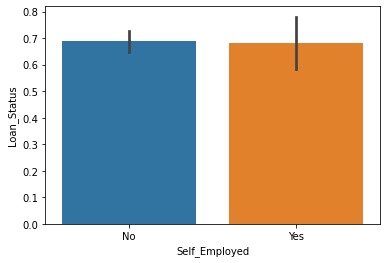

In [12]:
import seaborn as sns
sns.barplot(data=LA,x='Self_Employed',y='Loan_Status')

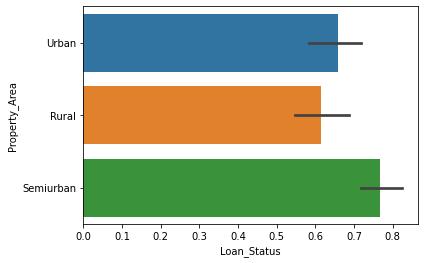

In [13]:
import seaborn as sns
sns.barplot(data=LA,x='Loan_Status',y='Property_Area')

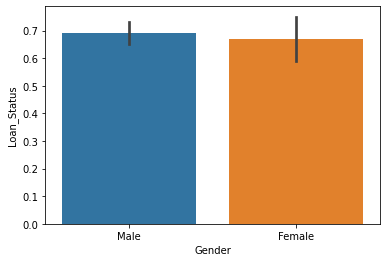

In [14]:
import seaborn as sns
sns.barplot(data=LA,x='Gender',y='Loan_Status')

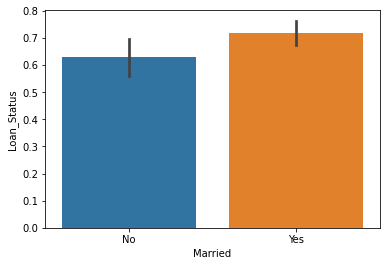

In [15]:
import seaborn as sns
sns.barplot(data=LA,x='Married',y='Loan_Status')

In [16]:
loan_approval=pd.get_dummies(LA)

In [17]:
loan_approval.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


In [18]:
y=loan_approval.Loan_Status.values
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [19]:
loan_approval.drop("Loan_Status",axis=1,inplace=True)

In [20]:
x=loan_approval.values
x

array([[0.000e+00, 5.849e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 4.583e+03, 1.508e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 3.000e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 8.072e+03, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+00, 7.583e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 4.583e+03, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rand_for=RandomForestClassifier(n_estimators=500,max_depth=7,min_samples_split=3,random_state=42)

In [24]:
rand_for.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
rand_for.score(x_train,y_train)

0.8513238289205702

In [26]:
rand_for.score(x_test,y_test)

0.8211382113821138

In [27]:
rand_for.score(x,y)

0.8452768729641694

In [28]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=10,random_state=0)

score=cross_val_score(rand_for,x,y,cv=kfold,scoring="accuracy")

score

C:\Users\bharat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.77419355, 0.83870968, 0.74193548, 0.75806452, 0.7704918 ,
       0.80327869, 0.86885246, 0.85245902, 0.78688525, 0.85245902])

In [29]:
score.mean()

0.8047329455314648

In [30]:
y_pred=rand_for.predict(x_test)

In [31]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [32]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=rand_for.classes_,columns=rand_for.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        0   1
Predicted        
0          14   3
1          19  87


ROC AUC: 0.70


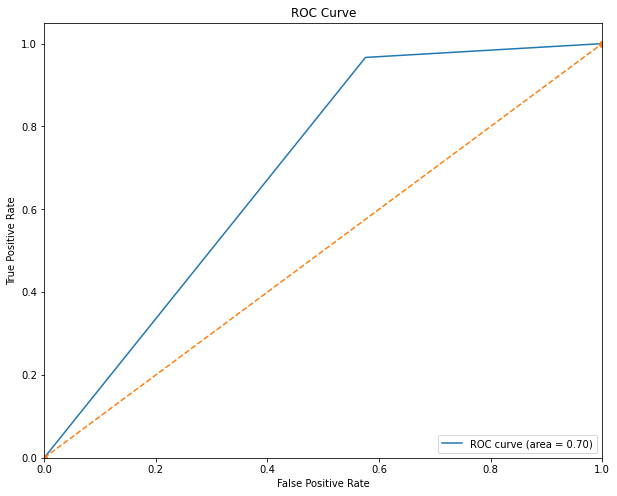

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
submission=pd.DataFrame(data = {'Loan_Status':y_pred})
submission["Loan_Status"]=submission["Loan_Status"].map({1: "Y", 0: "N"})

submission.to_csv('Sample_Submission.csv',index = False)

In [36]:

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [37]:
LA.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
def data(Gender, Married, Dependents, Education,Self_Employed,
         ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area):
    global df
    
    ls=[Gender, Married, np.int(Dependents), Education,Self_Employed,
         ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area]
    df=pd.DataFrame(np.reshape(ls,(1,-1)),columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
    cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
    df=pd.get_dummies(df)
    missing_cols_test = []
    for col in loan_approval.columns:
        if col not in df.columns:
            missing_cols_test.append(col)
        
    for i in missing_cols_test:
        df[i] = 0
    df=df[loan_approval.columns] 
    print(np.unique(loan_approval.columns==df.columns))
    re=rand_for.predict(df.values)
    if re==1:
        print('Loan will approve')
    else:
        print('Loan will not approve')
    
    return 
 
_ = widgets.interact(
    data, 
    Gender=['Male', 'Female'],
    Married=['No', 'Yes'],
    Dependents=[0, 1, 2, 3],
    Education=['Graduate', 'Not Graduate'],
    Self_Employed=['No', 'Yes'],
    ApplicantIncome=(150,81000,1),
    CoapplicantIncome=(200,41667,1),
    LoanAmount=(0,700,1),
    Loan_Amount_Term=(100,480,1),
    Credit_History=[1,0],
    Property_Area=['Urban', 'Rural', 'Semiurban'],   
)

interactive(children=(Dropdown(description='Gender', options=('Male', 'Female'), value='Male'), Dropdown(descr…